In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='t'>

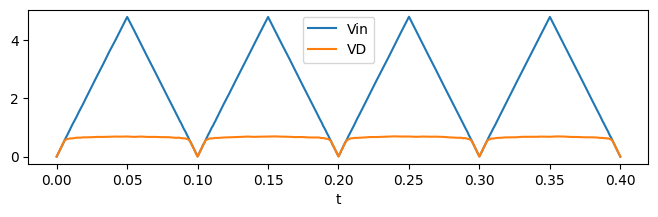

In [2]:
df = pd.read_csv("curva_diodo_comun.txt", sep='\t', names=["t","Vin","VD"], skiprows=1)

# agrego ruido para darle realismo
mean = 0
std_dev = 0.005

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["Vin"]= df["Vin"] + ruido

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["VD"]= df["VD"] + ruido

df.plot( x='t', y=["Vin","VD"],figsize=(8,2) )

#df.to_csv("diodo_silicio.csv", index=False)


<Axes: xlabel='t'>

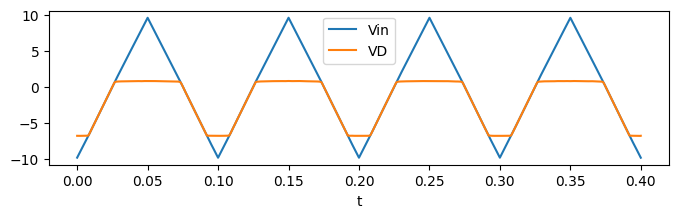

In [3]:
df = pd.read_csv("curva_diodo_zenner.txt", sep='\t', names=["t","Vin","VD"], skiprows=1)

# agrego ruido para darle realismo
mean = 0
std_dev = 0.005

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["Vin"]= df["Vin"] + ruido

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["VD"]= df["VD"] + ruido

df.plot( x='t', y=["Vin","VD"],figsize=(8,2) )

#df.to_csv("diodo_zenner.csv", index=False)


# MEDIA ONDA

<Axes: xlabel='t'>

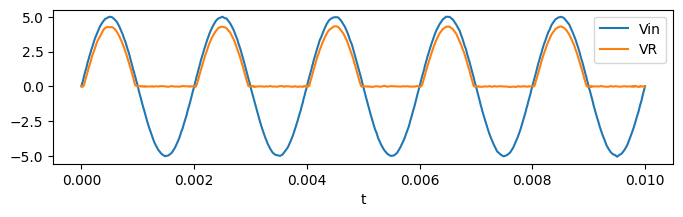

In [4]:
df = pd.read_csv("rect_media_onda.txt", sep='\t', names=["t","Vin","VR"], skiprows=1)

# agrego ruido para darle realismo
mean = 0
std_dev = 0.02

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["Vin"]= df["Vin"] + ruido

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["VR"]= df["VR"] + ruido

df.plot( x='t', y=["Vin", "VR"] ,figsize=(8,2) )

#df.to_csv("rect_media_onda.csv", index=False)


# Onda completa

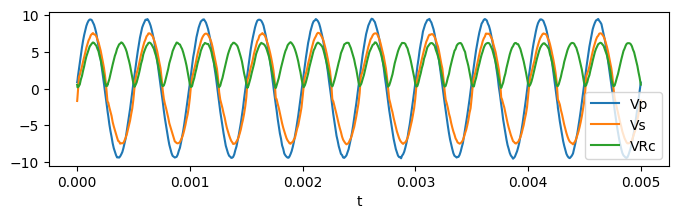

In [6]:
df = pd.read_csv("rect_onda_completa.txt", sep='\t', names=["t","Vs","Vp","VRc"], skiprows=1)

# agrego ruido para darle realismo
mean = 0
std_dev = 0.05

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vp"]))
df["Vp"]= df["Vp"] + ruido

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vp"]))
df["Vs"]= df["Vs"] + ruido

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vp"]))
df["VRc"]= df["VRc"] + ruido

df.plot( x='t', y=["Vp","Vs","VRc"] ,figsize=(8,2) )

df.to_csv("rect_onda_completa.csv", index=False)

# Onda completa - con filtro

In [21]:
df = pd.read_csv("rect_onda_completa_c_filtrado.txt", sep='\t', names=["t","VRc"], skiprows=1, encoding='utf-8', encoding_errors='replace')

df.head()

,t,VRc
0,Step Information: C_filtro=100n (Run: 1/4),NaN
1,0.000000000000000e+000,0.000000e+00
2,1.975094511214046e-007,5.511300e-16
3,3.940308969882462e-007,4.496330e-15
4,7.870737887219292e-007,3.961003e-14


In [22]:
columna_aviso = df.columns[0] # Asume la primera columna como la que contiene el aviso

# 1. Crear una máscara booleana: True para las líneas que empiezan con el patrón
mask_aviso = df[columna_aviso].astype(str).str.startswith("Step Information:")

# 2. Mostrar solo las filas que contienen el aviso
df_avisos = df[mask_aviso]

print("--- Líneas de aviso detectadas ---")
print(df_avisos)

--- Líneas de aviso detectadas ---
                                                 t  VRc
0      Step Information: C_filtro=100n  (Run: 1/4)  NaN
4005   Step Information: C_filtro=330n  (Run: 2/4)  NaN
7859     Step Information: C_filtro=1�  (Run: 3/4)  NaN
11738  Step Information: C_filtro=4.7�  (Run: 4/4)  NaN


In [25]:
df['Cid'] = mask_aviso.cumsum()

df_datos = df[~mask_aviso].copy()

df_datos.tail()

df_datos.to_csv("rect_onda_completa_C_filtrado.csv", index=False)

